In [1]:
##########################################################################
# Created on Sat Nov 13 15:22:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 11.3.1.BSM model intro

Differential equation\
$$\frac{ \partial f }{ \partial t }+rS\frac{ \partial f }{ \partial S }+\frac{1}{2}\frac{ {\partial}^2 f }{ \partial S^2 }\sigma ^2S^2=rf\tag{11-4}$$
where,\
f:price of call option\
S:underlying price\
r:risk free rate(continuous compound)\
$\sigma$:volatility of underlying return

$$c=S_0N(d_1)-Ke^{-rT}N(d_2)\tag{11-5}$$
$$p=Ke^{-rT}N(-d2)-S_0N(-d_1)\tag{11-6}$$
$$d_1=\frac{ln(S_0/K)+(r+\sigma ^2/2)T}{\sigma \sqrt{T}}$$
$$d_2=\frac{ln(S_0/K)+(r-\sigma ^2/2)T}{\sigma \sqrt{T}}=d_1-\sigma\sqrt{T}$$
where,\
$N(\cdot)$:CDF(Cumulative Distribution Function) of standard normal distribution

In [14]:
def option_BSM(S,K,sigma,r,T,opt):
    '''Define a function to calculate European option price using BSM model.
    S:underlying price
    K:strike price
    sigma:volatility of underlying return(annualized)
    r:risk free rate(continuous compound)
    T:tenor of option in year
    opt:option type. 'call'indicates call option, otherwise put option '''
    from numpy import log, exp, sqrt
    from scipy.stats import norm
    
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
    d2=d1-sigma*sqrt(T)
    if opt=='call':
        value=S*norm.cdf(d1)-K*exp(-r*T)*norm.cdf(d2)
    else:
        value=K*exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)
    return value

In [16]:
sigma_ICBC=0.205
S_ICBC=5.0
K_ICBC=5.2
shibor=0.02601
tenor=3/12

call_BSM=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='call')
put_BSM=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='put')

print('price of European call option using BSM is ',round(call_BSM,4))
print('price of European put option using BSM is ',round(put_BSM,4))

price of European call option using BSM is  0.1351
price of European put option using BSM is  0.3014


# 11.3.2.Relationship between option price and underlying

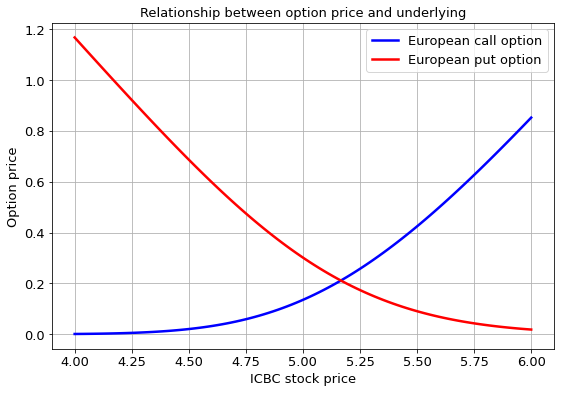

In [17]:
import numpy as np
import matplotlib.pyplot as plt

S_list=np.linspace(4.0,6.0,100)
call_list1=option_BSM(S=S_list,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='call')
put_list1=option_BSM(S=S_list,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='put')

plt.figure(figsize=(9,6))
plt.plot(S_list,call_list1,'b-',label='European call option',lw=2.5)
plt.plot(S_list,put_list1,'r-',label='European put option',lw=2.5)
plt.xlabel('ICBC stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Option price',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option price and underlying',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 11.3.3.Relationship between option price and strike

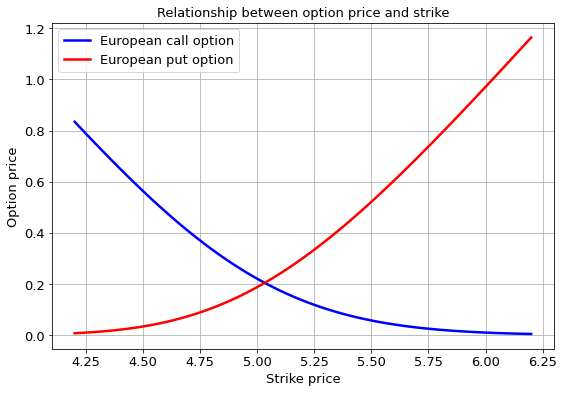

In [18]:
K_list=np.linspace(4.2,6.2,100)
call_list2=option_BSM(S=S_ICBC,K=K_list,sigma=sigma_ICBC,r=shibor,T=tenor,opt='call')
put_list2=option_BSM(S=S_ICBC,K=K_list,sigma=sigma_ICBC,r=shibor,T=tenor,opt='put')

plt.figure(figsize=(9,6))
plt.plot(K_list,call_list2,'b-',label='European call option',lw=2.5)
plt.plot(K_list,put_list2,'r-',label='European put option',lw=2.5)
plt.xlabel('Strike price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Option price',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option price and strike',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 11.3.4.Relationship between option price and volatility

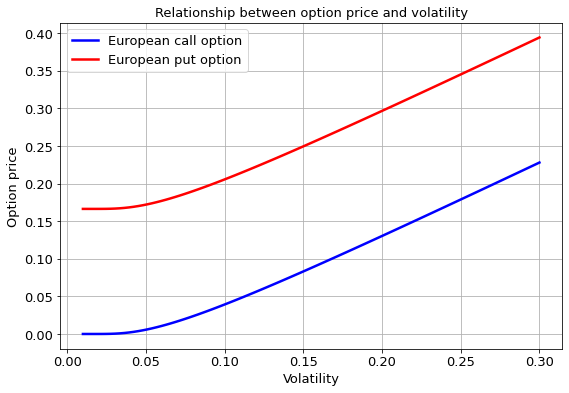

In [19]:
sigma_list=np.linspace(0.01,0.3,100)
call_list3=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_list,r=shibor,T=tenor,opt='call')
put_list3=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_list,r=shibor,T=tenor,opt='put')

plt.figure(figsize=(9,6))
plt.plot(sigma_list,call_list3,'b-',label='European call option',lw=2.5)
plt.plot(sigma_list,put_list3,'r-',label='European put option',lw=2.5)
plt.xlabel('Volatility',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Option price',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option price and volatility',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 11.3.5.Relationship between option price and risk free rate

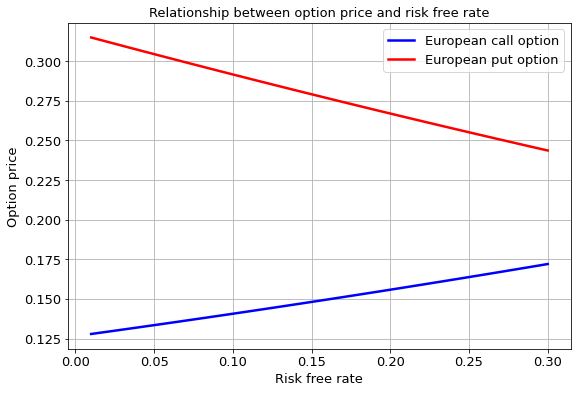

In [20]:
shibor_list=np.linspace(0.01,0.1,100)
call_list4=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor_list,T=tenor,opt='call')
put_list4=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor_list,T=tenor,opt='put')

plt.figure(figsize=(9,6))
plt.plot(sigma_list,call_list4,'b-',label='European call option',lw=2.5)
plt.plot(sigma_list,put_list4,'r-',label='European put option',lw=2.5)
plt.xlabel('Risk free rate',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Option price',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option price and risk free rate',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 11.3.6.Relationship between option price and tenor

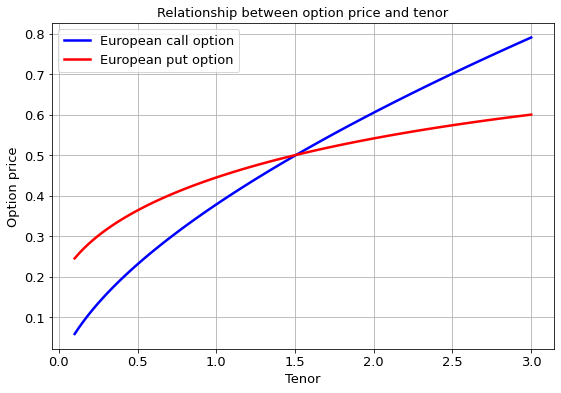

In [21]:
tenor_list=np.linspace(0.1,3.0,100)
call_list5=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor_list,opt='call')
put_list5=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor_list,opt='put')

plt.figure(figsize=(9,6))
plt.plot(tenor_list,call_list5,'b-',label='European call option',lw=2.5)
plt.plot(tenor_list,put_list5,'r-',label='European put option',lw=2.5)
plt.xlabel('Tenor',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Option price',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option price and tenor',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 11.3.7.Intrinsic value and time value

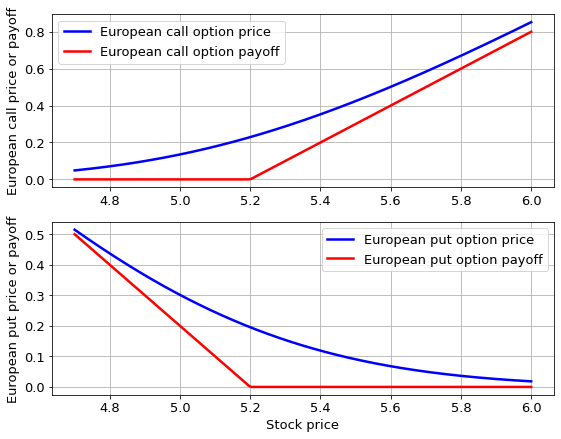

In [22]:
S_list=np.linspace(4.7,6,200)
price_call=option_BSM(S=S_list,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='call')
price_put=option_BSM(S=S_list,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='put')

profit_call=np.maximum(S_list-K_ICBC,0)
profit_put=np.maximum(K_ICBC-S_list,0)

plt.figure(figsize=(9,7))
plt.subplot(2,1,1)
plt.plot(S_list,price_call,'b-',label='European call option price',lw=2.5)
plt.plot(S_list,profit_call,'r-',label='European call option payoff',lw=2.5)
plt.xticks(fontsize=13)
plt.ylabel('European call price or payoff',fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.grid()

plt.subplot(2,1,2)
plt.plot(S_list,price_put,'b-',label='European put option price',lw=2.5)
plt.plot(S_list,profit_put,'r-',label='European put option payoff',lw=2.5)
plt.xlabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('European put price or payoff',fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()